In [1]:
%reset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

#Required by Jupyter for inlining images
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
#Read data frames
Intensities_B1 = pd.read_pickle('../Data/Beam1_SPSandLHC.pkl')
Intensities_B1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 4 columns):
Time Stamp          1022 non-null float64
Time Differences    1022 non-null float64
SPS Reading         1022 non-null float64
LHC Reading         1022 non-null float64
dtypes: float64(4)
memory usage: 32.0 KB


In [16]:
X = np.column_stack((Intensities_B1['LHC Reading'], Intensities_B1['SPS Reading']))

clf = LocalOutlierFactor(n_neighbors=250, contamination = 0.1) 
Y_pred = clf.fit_predict(X) #Runs LoF to look for outliers

df = pd.DataFrame({'Pred': Y_pred, 'BLM': X[:,0], 'Intensities': X[:,1]})
is_outlier = df['Pred']==-1
outliers = df[is_outlier]


not_outlier = df['Pred']==1
inliers = df[not_outlier]

/home/marc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


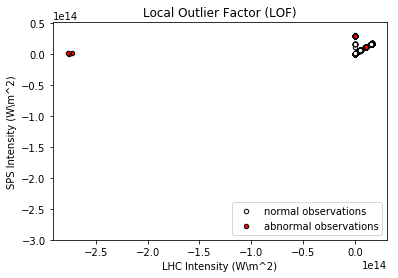

In [18]:
# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(-3e14, 10e10, 100))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(inliers['BLM'], inliers['Intensities'], c='white',
                edgecolor='k', s=20)
b = plt.scatter(outliers['BLM'], outliers['Intensities'], c='red',
                edgecolor='k', s=20)
plt.axis('tight')
#plt.xlim((-0.1e13, max(df['BLM']+0.1e13)))
#plt.ylim(0,0.35e14)
plt.xlabel('LHC Intensity (W\m^2)')
plt.ylabel('SPS Intensity (W\m^2)')
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="lower right")
plt.show()